In [1]:
import sys
sys.path.append('../mj_etc/')
from etc_class import *
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [2]:
etc = ETC('moaR','MOA','1.8m',moon_phase='dark')

<Quantity 736.1 s>

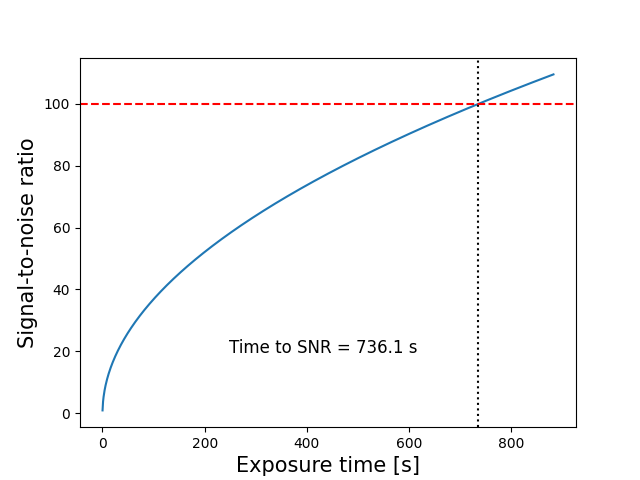

In [3]:
etc.time_for_snr(100,mag=20,plot=True)

In [4]:
etc.print_status()

Detector: MOA
Filter: moaR
Detector qe: 0.88
Telescope: 1.8m
Diameter: 1.8 m
Telescope throughput: 1
Source: 20
Aperture: 28.274333882308138
Sky: 20.8
Sky photons: 6078.063596905919 1 / s
Source photons: 449.1308198085046 1 / s


